# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
random_state = 42
mnist = fetch_openml("mnist_784")
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, train_size=0.5, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

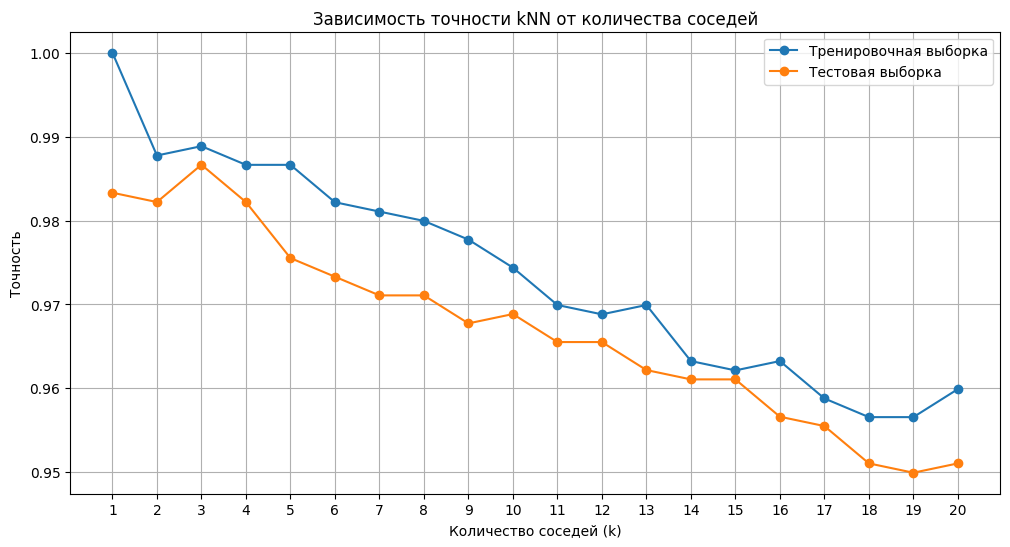

In [72]:
train_accuracies = []
test_accuracies = []
for k in range(1, 21):
    #создание модели
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #подсчет аккуратности 
    y_train_pred = knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
    y_test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

#отрисовка графиков зависиомсти точности от k (кол-ва соседей)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), train_accuracies, label='Тренировочная выборка', marker='o')
plt.plot(range(1, 21), test_accuracies, label='Тестовая выборка', marker='o')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.title('Зависимость точности kNN от количества соседей')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** При k = 1, тренировочная модель ищет ближайшего соседа, которой является она сама. Поэтому нетрудно догадаться почему ее аккуратность составляет 100% - модель предсказывает саму себя. Эта одна из причин, почему использовать k = 1 для обучающей модели не показательно.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

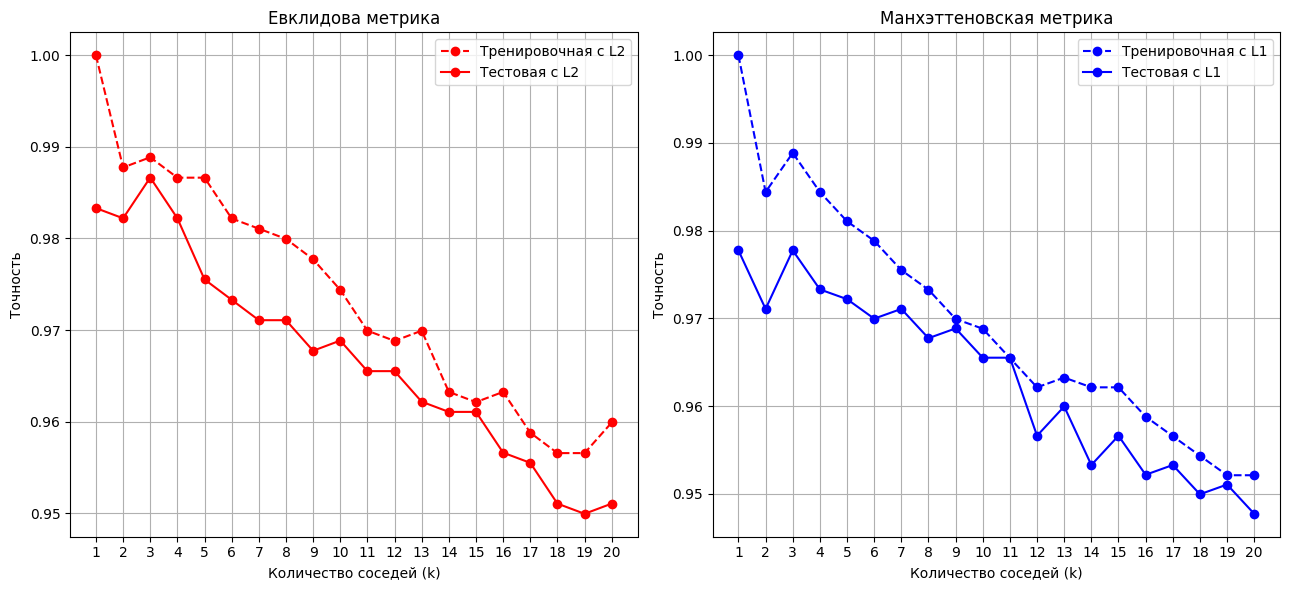

In [73]:
#у KNeighborsClassifier есть прекрасный пармаетр metric, который и поможет в этой задаче 

metrics = ['euclidean', 'manhattan']
train_acc = {'euclidean': [], 'manhattan': []}
test_acc = {'euclidean': [], 'manhattan': []}

for metric in metrics:
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        
        y_train_pred = knn.predict(X_train)
        train_acc[metric].append(accuracy_score(y_train, y_train_pred))
        
        y_test_pred = knn.predict(X_test)
        test_acc[metric].append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(13, 6))
x_degree = range(1, 21)
# график для Евклидова расстояния
plt.subplot(1, 2, 1)
plt.plot(x_degree, train_acc['euclidean'], label='Тренировочная с L2', marker='o', linestyle='--', color='red')
plt.plot(x_degree, test_acc['euclidean'], label='Тестовая с L2', marker='o', color='red')
plt.title('Евклидова метрика')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(x_degree)
plt.grid(True)
plt.legend()

# график для Манхэттеновского расстояния
plt.subplot(1, 2, 2)
plt.plot(x_degree, train_acc['manhattan'], label='Тренировочная с L1', marker='o', linestyle='--', color='blue')
plt.plot(x_degree, test_acc['manhattan'], label='Тестовая с L1', marker='o', color='blue')
plt.title('Манхэттеновская метрика')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(x_degree)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Нетрудно заметить, что точность выше при Евклидовой метрике. Это легко объясняется тем, что мы работаем с векторами большой размерности и данные в них расположены кучнее. Поэтому, при бОльших k, метрика L1 уже не различает геометрические признаки: для нее размываются подобные важные детали. Однако евклидова метрика, в силу геометрических особенностей, рассматривает более кучные данные, что дает большую точность.

**Выводы:** Проведено было два исследования. Анализ точности в первом иследовании дал нам следующий резльутат: наилучшая выборка k равна 3. Это говорит о том, что при больших мы "перетенерировываем" модель и она "слабее" видит разницу между размытми точками. Это было предсказуемо и продемонстрировано на лекции.  Второе же исследование привело нас к выводу, что результаты моделей могут сильно отличаться от метрики, которую мы используем. Это подчеркивает, что разные сферы требудют своих инструментов: в MNIST лучше использовать Евклидову метрику, а при более "шумных" данных Манхэттоновскую. Также Манхэтоновская метрика сильно страдает из-за высокой мерности векторов, которые мы сравниваем.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [78]:
import pandas as pd
import seaborn as sns

titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [76]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [79]:
#подсчет строк с хотя бы одним пропуском
rows_with_nan = titanic.isnull().any(axis=1).sum()
print(f"Всего строк с пропусками: {rows_with_nan}") 

#удаление с помощью метода dropna
titanic.dropna(inplace=True)
X, y = titanic[features_columns], titanic[target_column]

Всего строк с пропусками: 708


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

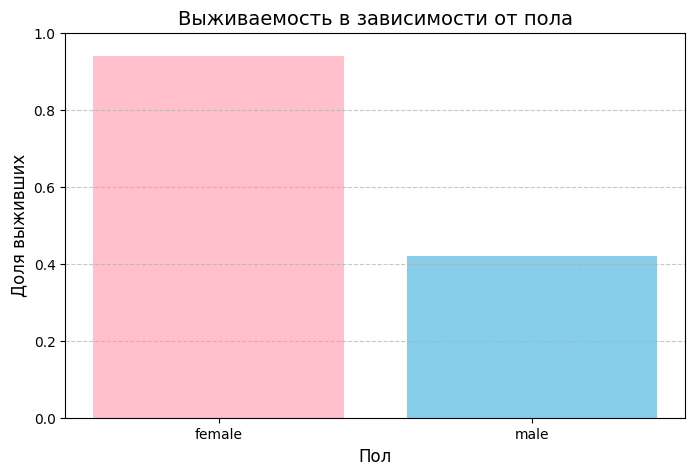

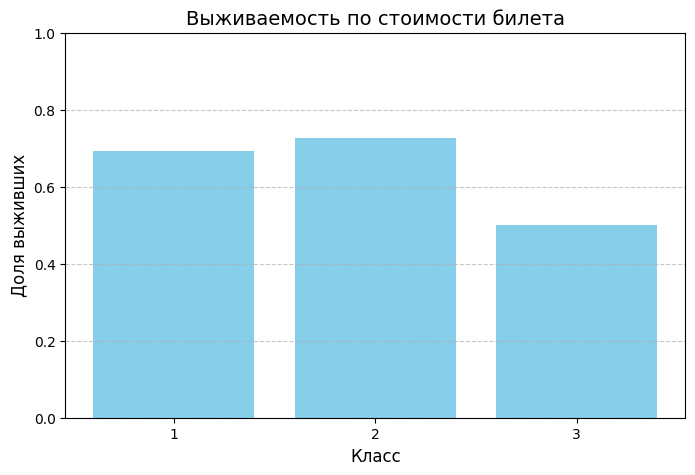

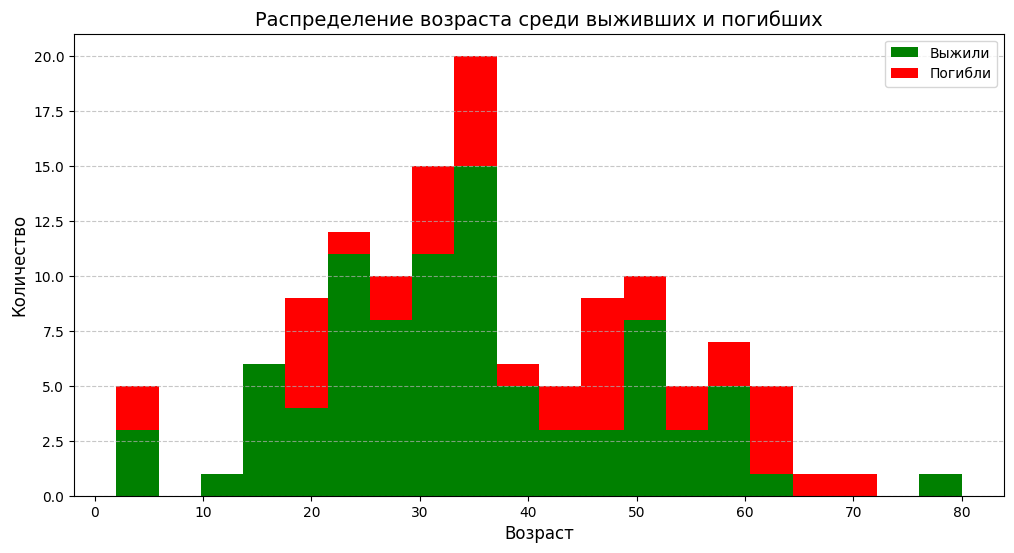

In [67]:
# Влияние пола на выживаемость
plt.figure(figsize=(8,5))
train_data = pd.concat([X_train, y_train], axis=1)
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()

plt.bar(survival_by_sex.index, survival_by_sex.values, color=['pink', 'skyblue'])
plt.title('Выживаемость в зависимости от пола', fontsize=14)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Влияние класса на выживаемость
plt.figure(figsize=(8,5))
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()

plt.bar(survival_by_class.index.astype(str), survival_by_class.values, color='skyblue')
plt.title('Выживаемость по стоимости билета', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Возраст и выживаемость
plt.figure(figsize=(12,6))
survived = train_data[train_data['Survived'] == 1]['Age']
not_survived = train_data[train_data['Survived'] == 0]['Age']

plt.hist([survived, not_survived], bins=20, stacked=True, 
         color=['green', 'red'], label=['Выжили', 'Погибли'])
plt.title('Распределение возраста среди выживших и погибших', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

 Первое дерево будет глубины 2 и будет проверять параметр пол (Sex). По графику "Выживаемость в зависимости от пола" нетрудно заметить, что выжило большинство женщин. Значит если человек женищна, то скорее выжила. Иначе переходим к следующему уровню: возраст. Чаще всего молодые выживали, так что если возраст меньше 20, то скорее всего выжил. 
 Правило:

Первый уровень (Sex):
Если пассажир женского пола → предсказываем Survived=1.
Если пассажир мужского пола → переходим ко второму уровню.
Второй уровень (Age):
Если возраст мужчины ≤ 20 лет → предсказываем Survived=1.
Если возраст > 20 лет → предсказываем Survived=0.


**Дерево 2:**
Второе дерево будет глубины 1 и будет проверять только парметр класса. По графику видно, что люди, купившие билеты второго класса, чаще всего выживали. 
Правило:

Если класс билета (Pclass) = 2 → предсказываем Survived=1.
Иначе → Survived=0. 



Реализуйте полученные деревья по шаблону

In [68]:
def tree1(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    В зависимости от пола и возраста предсказывает выжил или нет.
    Sex == female -> Survived=1
    Sex == male && Age <= 20 -> Survived=1
    Иначе -> Survived=0
    """
    predicted = pd.Series(0, index=features.index)
    # Женщины выживают
    female_mask = features['Sex'] == 'female'
    predicted[female_mask] = 1
    # Мужчины младше 20 лет
    male_child_mask = (features['Sex'] == 'male') & (features['Age'] <= 20)
    predicted[male_child_mask] = 1
    return predicted

def tree2(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    В зависимости от класса билета предсказывает выжил или нет.
    Pclass == 2 -> Survived=1
    Иначе -> Survived=0
    """
    return (features['Pclass'] == 2).astype(int)


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [69]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    return (target == predicted).mean()


Accuracy дерева 1: 0.76
Accuracy дерева 2: 0.44


In [70]:
acc_tree1 = accuracy(y_test, tree1(X_test))
acc_tree2 = accuracy(y_test, tree2(X_test))

print(f"Accuracy дерева 1: {acc_tree1:.2f}")
print(f"Accuracy дерева 2: {acc_tree2:.2f}")

Accuracy дерева 1: 0.76
Accuracy дерева 2: 0.44


#### Выводы
Первое логическое дерево явно лучше сработало, чем второе, поскольку рассматриваются более "коррелирующие" параметры. К тому же банально больше условий, что почти всегда ведет к более точным результатам. Однако в любом случае, аккуратность 76% все еще недостаточна, поскольку на больших данных такая погрешность как 24% огромна и может привести к большим потерям. Также стоит отметить, что во втором дереве в качестве параметра возможно лучше было бы использовать параметр "Fare", отражающий стоимость билета, нежели уже сами билеты. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** В целом параметры "SibSp" и "Parch" слабые, поскольку несут слабую логическую зависимость с параметром выживаемости(тяжело работать с датасетом в котором 80% Parch = 0). К тому же эти парметры неравномерно распрделены и могут коррелировать с параметром "Fare". 
Однако параметр "Pclass" лишен этих недостатков поскольку равномернее распределен и более явно коррелирует с выживаемостью(удаленность от шлюпок, более трепетное отношение к богачам и т.п)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [95]:
features = ['Pclass', 'Age', 'Sex', 'Fare']
X = titanic[features].replace({'male': 0, 'female': 1}) #иначе fit не работает
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acсuracy_knn = knn.score(X_test, y_test)
acсuracy_knn

/var/folders/r1/1y7kwnsn7hs3y_cdn4lt2ks80000gn/T/ipykernel_16684/2447805632.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = titanic[features].replace({'male': 0, 'female': 1}) #иначе fit не работает


0.6909090909090909

### Выводы 

Точность модели составила всего 65%, что может являтся следствием некореллированности данных или разбросанности данных. Также скорее всего это связано с тем, что некоторые данные у нас имеют разную степень градации, например цена лежит в диапазоне [1, 10000], а классы меняются в диапазоне [1, 3]. Однако изменение цены на 1 пункт нисколько незначительно, но смена класса крайне важна.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [93]:
for column in X.columns:
    print(f"{column}: min={X[column].min()}, max={X[column].max()}")

Pclass: min=1, max=3
Age: min=0.92, max=80.0
Sex: min=0, max=1
Fare: min=0.0, max=512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  KNN сильно завязан на метрике, а метрика никак не различает разницу в один пункт между ценой и полом. Однако в рамках нешего исследования это различие в один пункт между полом существенен, а между ценой за билет нет.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Проблема в том, что выбросы данных могут сильно "растягивать" Max - Min, хотя основные данные лежат в довольно узком диапазоне. Поэтому возможно стоит делать это умнее, ищя мат ожидание среднего диапазона


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [103]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [99]:
print("Обучающая выборка (нормализованная):")
for i, feature in enumerate(features):
    print(f"{feature}: min={X_train_scaled[:, i].min():.2f}, max={X_train_scaled[:, i].max():.2f}")
print("\nТестовая выборка (нормализованная):")
for i, feature in enumerate(features):
    print(f"{feature}: min={X_test_scaled[:, i].min():.2f}, max={X_test_scaled[:, i].max():.2f}")

Обучающая выборка (нормализованная):
Pclass: min=0.00, max=1.00
Age: min=0.00, max=1.00
Sex: min=0.00, max=1.00
Fare: min=0.00, max=1.00

Тестовая выборка (нормализованная):
Pclass: min=0.00, max=1.00
Age: min=-0.01, max=0.88
Sex: min=0.00, max=1.00
Fare: min=0.00, max=0.51


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [105]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)
acсuracy_knn, accuracy_scaled

(0.6909090909090909, 0.7272727272727273)

**Вывод:** Точность повысилась, но не намного(всего 4%). Точность модели составила всего 73%, что может являтся следствием некореллированности данных или разбросанности данных.
Однако на других данных этот метод нормализации может дать более благоприятное изменение.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

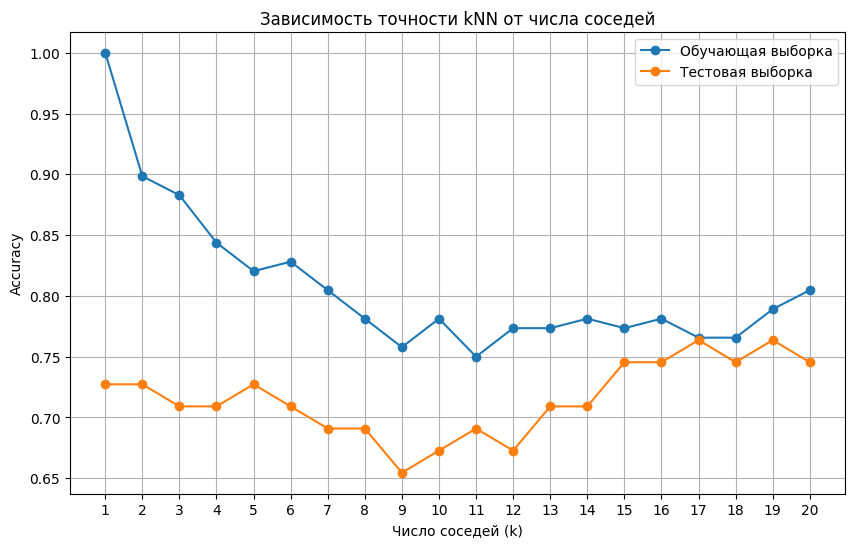

In [113]:
train_accuracies = []
test_accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Предсказание для обучающей и тестовой выборок
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Расчет точности
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, label='Обучающая выборка', marker='o')
plt.plot(range(1, 21), test_accuracies, label='Тестовая выборка', marker='o')
plt.xlabel('Число соседей (k)')
plt.ylabel('Accuracy')
plt.title('Зависимость точности kNN от числа соседей')
plt.xticks(range(1, 21))
plt.grid(True)
plt.legend()
plt.show()

**Вывод:** Лучшая точность у нас достигается при k = 17, что говорит о том, что данные у нас несколько "шумноваты" и kNN постепенно их сгладила, что неудивительно с учетом, того что у нас реальные даннные людей и понятно, что ориетриуясь на малых значениях мы получим малозначимые результаты.

#### Глобальный вывод
Мы поработали с двумя методами: логичческим деревом и kNN. Оба варианта имеют свои преимущества, однако на мой взгляд логическое дерево имеет такой недостаток как человеческий фактор: нужно вручную анализировать данные и строить дерево. Однако если возникают довольно очевидные условия, то логическое дерево может повысить точность модели kNN : мы просто будем запускать kNN по векторам меньшей длины, т.е по меньшим параметрам. У kNN есть свои также недостатки в виде выбросов и разреженных данных и данных в разных метриках, которые могут сильно ухудшить точность прогнозирования. Был рассмотрен вариант нормализации путем линейного "сжатия" координат, однако он тоже имеет свои недостатки.